# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

<b>Question 1:</b> Is the distribution of body temperatures normal?

Let's try to understand the sample first

In [7]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [26]:
df.head(3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


Next I will plot the temperature series to visually examine our sample,

C:\Users\Lana\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


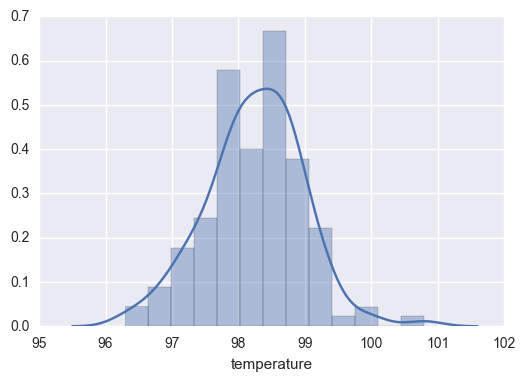

In [23]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

sb.distplot(df['temperature'])

Obviously just by looking at the chart it is difficult to understand if the distribution is in fact normal, so we will have to test our hypotheses.

First, let's define the significance level to be 1%. If the probability of observing a particular test statistic is less than that level, we will reject the null hypothesis.

In [55]:
import scipy.stats as stats
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Based on this chi-square statistic and the p-value, we fail to reject the null hypothesis that the sample comes from a normal distribution at 1% significance level. That is to say tat we are fairly confident that the sample came from population with a normal distribution.

We can also employ the Anderson-Darling test to see if the sample came from a normal distribution.

In [42]:
stats.anderson(df['temperature'], dist = 'norm')

AndersonResult(statistic=0.52010388267143526, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Here the test statistic is lower than any of the critical values, even for a pretty liberal 15% significance level. Hence, we again fail to reject the hypothesis that the sample is drawn from a population with a normal distribution. 

<b>Question 2:</b> Is the sample size large? Are the observations independent?

We've already determined that there are 130 observations in the sample, which is large enough to use the z-statistic instead of the t-statistic for any hypothesis testing on the sample. However, if we consider our population of possible temperatures to be more than 7 billion (based on the number of people in the world), this sample seems very small.

It would be fair to assume that each person for the study was randomly selected from the population. Hence, for a study like this it would be reasonable to assume that the observations are independent. 

<b>Question 3:</b> Is the true population mean really 98.6 degrees F? Would you use a one-sample or two-sample test? Why? In this situation, is it appropriate to use the  <i>t</i>  or  <i>z</i>  statistic? Now try using the other test. How is the result be different? Why?

Having established that the sample most likely comes from a normal distribution and that the observations are assumed to be independent, we can test some hypothesis about the population mean. <br></br>

We only observe a sample from the population. The true population mean will always remain an unknown. However, we can test the likelihood of observing this sample (which has a human temperature mean of 98.2 &#176;C), if our hypothesized population mean were true. So

Ho: normal body temperature = 98.6 &#176;F<br></br>
Ha: normal body temperature is not 98.6 &#176;F (either less than 98.6 &#176;F or more than 98.6 &#176;F)

Because we are testing for both alternatives, that the hypothesized population mean is less than or greater than 98.6 &#176;F, we will be using a two-sided test. Even though our sample has greater than 30 observations, we don't know the population standard deviation, so we should use the <i>t</i> statistic. However, I will try the <i>z</i> statistic first and will follow up with a <i>t</i> statistic.

There is no special z-test available for the scipy library, but it should be easy to calculate ourselves.

$$z-score=\frac{sample mean \pm population mean}{standarderror}$$

$$standarderror=\frac{samplestandarddeviation}{\sqrt{samplesize}}$$

In [18]:
se = np.std(df['temperature'])/np.sqrt(len(df['temperature']))
z_score = (np.mean(df['temperature'])-98.6)/se
z_score

-5.4759252020781162

In [24]:
stats.norm.cdf(z_score)

2.1761575829410943e-08

So the probability of observing this sample, if the population mean were 98.6 &#176;C, is very small, much less than 1%, so we reject the null hypothesis that the population mean is 98.6 &#176;C.

Now let's try the t-test, which has fatter tails.

In [27]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

We see here that the test statistic is pretty much the same in both tests. However, the p-value is higher in the t-test, which is again explained by fatter tails. Nonetheless, p-value is still well below the 1% significance level and, hence, we can again reject the null hypothesis that the population mean is 98.6.  

<b>Question 4</b>: At what temperature should we consider someone's temperature to be "abnormal"?

To consider when someone's temperature is "abnormal", let's construct a 99% confidence interval around our sample mean. <br></br><br></br>
First, let's calculate the margin of error based on the assumption that the underlying population distribution is normal.

$$marginoferror=zscoreat99percentlevelofconfidence*\frac{samplestandarddeviation}{\sqrt{samplesize}}$$

zscoreat99percentlevelofconfidence = 2.58

In [33]:
se = np.std(df['temperature'])/np.sqrt(len(df['temperature']))
se

0.064056614695193359

In [35]:
marginoferror = 2.58 * se
marginoferror

0.16526606591359888

Then, we can say that the likely range of average normal body temperatures is as follows, with a 99% confidence:

$$samplemean \pm marginoferror$$

In [43]:
upperlimit = np.mean(df['temperature']) + marginoferror
lowerlimit = np.mean(df['temperature']) - marginoferror

print('confidence interval is [', lowerlimit, ', ', upperlimit,']')

confidence interval is [ 98.0839647033 ,  98.4144968351 ]


<b>Question 5:</b> Is there a significant difference between males and females in normal temperature? What test did you use and why? Write a story with your conclusion in the context of the original problem.

First, let's determine the sample mean for both males and females. 

In [49]:
female_sample = df['temperature'][df.gender == 'F']
female_samplemean = np.mean(female_sample)
female_samplemean

98.39384615384613

In [52]:
male_sample = df['temperature'][df.gender == 'M']
male_samplemean = np.mean(male_sample)
male_samplemean

98.1046153846154

We can see that the averages for the two samples are different, but is the difference significant?

I will employ the two-sided t-test to test the null hypothesis that the two averages are different. Again, even though both of our samples have more than 30 observations, the true population standard deviation for both samples remains unknown, so a t-test is preferred.

Ho: difference in average temperature between males and females = 0<br></br>
Ha: difference in average temperature between males and females is greater than or less than 0

In [53]:
stats.ttest_ind(female_sample, male_sample)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

It's very interesting, because the test shows that at 1% significance level we fail to reject the null hypothesis that there is no difference between the two populations. At the 5% significance level, however, we would reject that null hypothesis and would
conclude that males and females do indeed have different temperatures.

<br></br>

Given the limitations of the problem -- given that we don't know how the sample was collected + given that the sample is very small compared to the full population -- we can do only as much to project our conclusions to the entire population. However, if we assume that the sample is representative of the population, we can already challenge the assumption that the average human body temperature is 98.6 &#176;F. At the same time, it is difficult to tell whether there is any difference between males and females. That conclusion depends on the significance level that we assume, which is quite biased. It means that our model can serve as evidence that either there is a material difference between the two populations or that the average temperature for males and females is the same.